# **Diabetes Prediction**

*Predict whether a person has diabetes or not.*

*Dataset Link: https://www.kaggle.com/johndasilva/diabetes*

In [35]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [36]:
# Loading the dataset
df = pd.read_csv('/content/sample_data/kaggle_diabetes.csv')

# Exploring the dataset

In [37]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [38]:
# Returns an object with all of the column headers
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [40]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [41]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [42]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [43]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [44]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [45]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

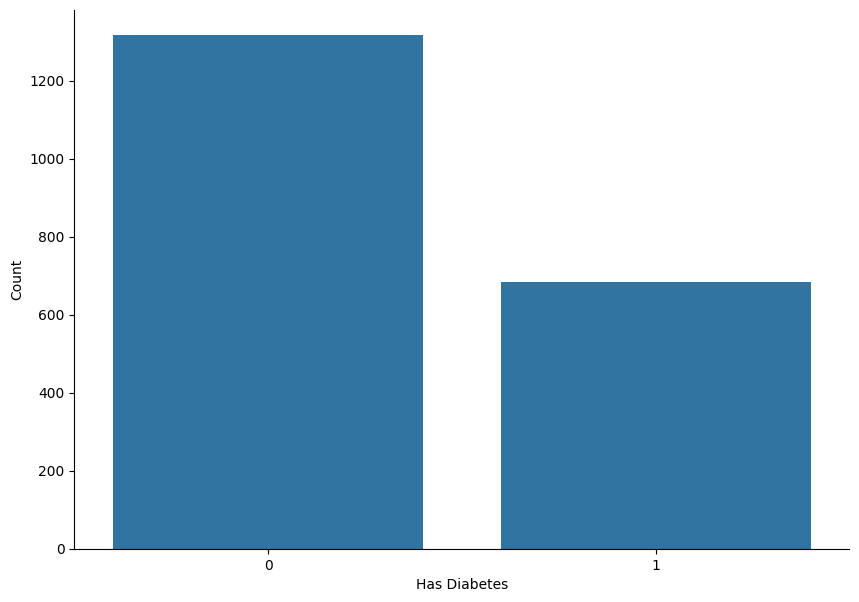

In [46]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

# Data Cleaning

In [47]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

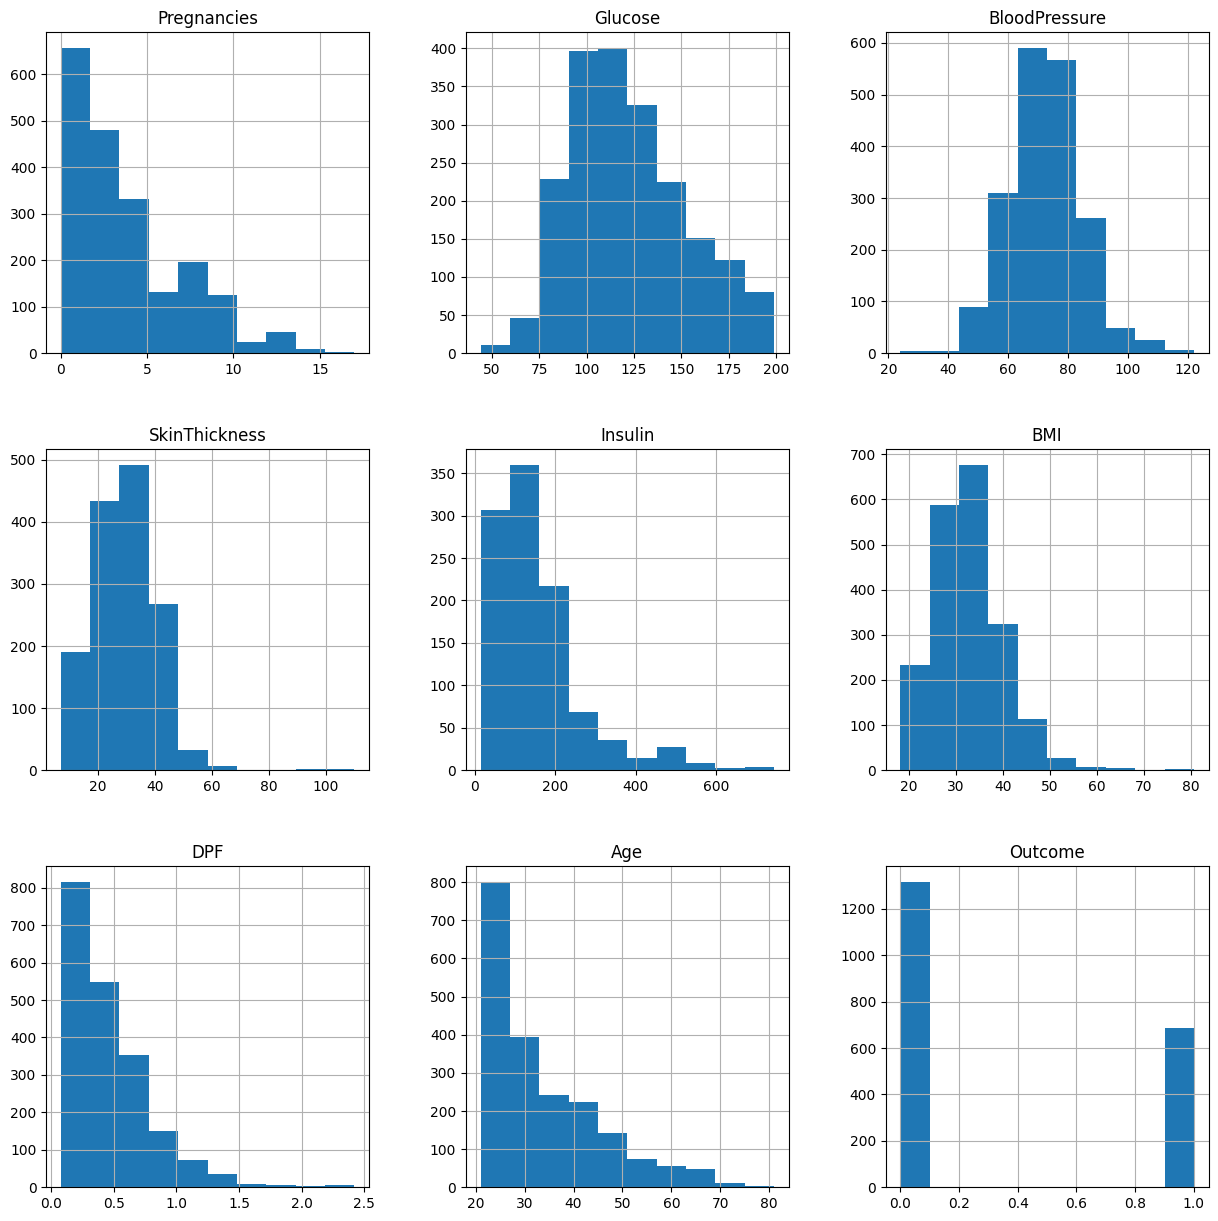

In [48]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [49]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

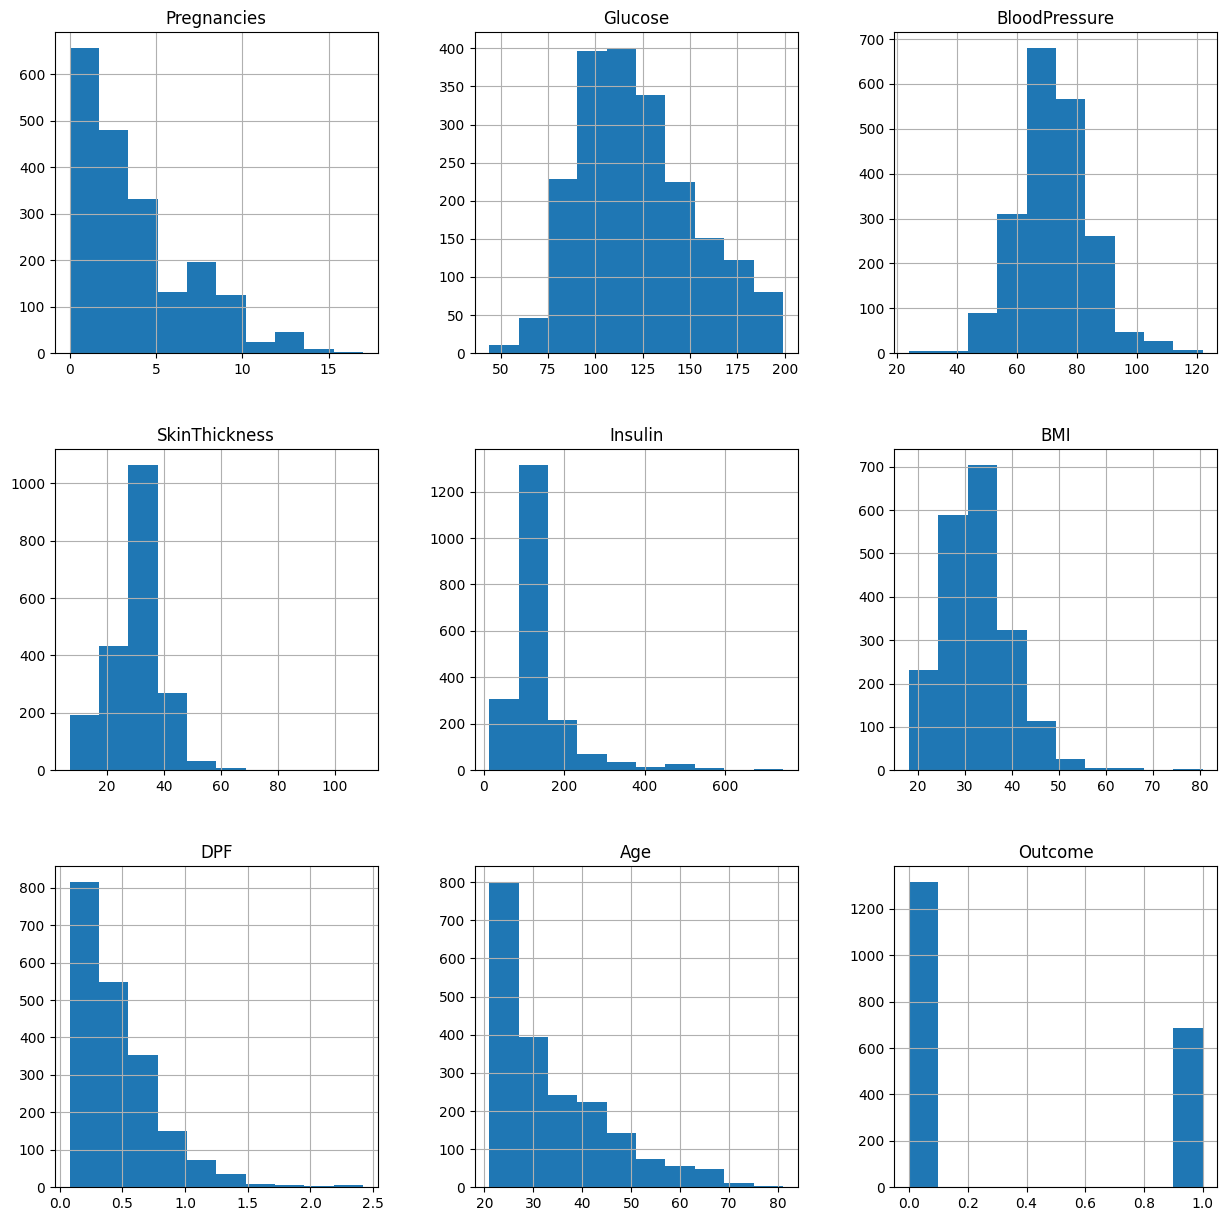

In [50]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [51]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Model Building - Deep Neural Network

In [52]:
print(df.head(5))
import pandas as pd

# Storing the preprocessed to git local.
df.to_csv("/content/preprocessed_diabetics_dataset.csv")



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            2      138             62             35        0  33.6  0.127   
1            0       84             82             31      125  38.2  0.233   
2            0      145              0              0        0  44.2  0.630   
3            0      135             68             42      250  42.3  0.365   
4            1      139             62             41      480  40.7  0.536   

   Age  Outcome  
0   47        1  
1   23        0  
2   31        1  
3   24        1  
4   21        0  


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error


df = pd.read_csv("/content/preprocessed_diabetics_dataset.csv")

# Define input and outputs
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DPF", "Age"]]
y = df[["Outcome"]]

# Data needs to be scaled to  0 to 1 for the neural network to train correctly.
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
X[X.columns] = X_scaler.fit_transform(X[X.columns])
y[y.columns] = y_scaler.fit_transform(y[y.columns])

# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



<ipython-input-53-d18d38e6fb82>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = X_scaler.fit_transform(X[X.columns])
<ipython-input-53-d18d38e6fb82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.columns] = y_scaler.fit_transform(y[y.columns])


In [54]:

# Create a Neural Network model
model = Sequential()
model.add(Dense(50, input_dim=8, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(
    loss='mean_squared_error',
    optimizer='SGD'
)

# Train the model
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    shuffle=True,
    verbose=2
)

Epoch 1/50
188/188 - 1s - loss: 0.2163 - 704ms/epoch - 4ms/step
Epoch 2/50
188/188 - 0s - loss: 0.2047 - 247ms/epoch - 1ms/step
Epoch 3/50
188/188 - 0s - loss: 0.1968 - 253ms/epoch - 1ms/step
Epoch 4/50
188/188 - 0s - loss: 0.1889 - 246ms/epoch - 1ms/step
Epoch 5/50
188/188 - 0s - loss: 0.1804 - 253ms/epoch - 1ms/step
Epoch 6/50
188/188 - 0s - loss: 0.1731 - 246ms/epoch - 1ms/step
Epoch 7/50
188/188 - 0s - loss: 0.1678 - 242ms/epoch - 1ms/step
Epoch 8/50
188/188 - 0s - loss: 0.1639 - 243ms/epoch - 1ms/step
Epoch 9/50
188/188 - 0s - loss: 0.1611 - 243ms/epoch - 1ms/step
Epoch 10/50
188/188 - 0s - loss: 0.1591 - 238ms/epoch - 1ms/step
Epoch 11/50
188/188 - 0s - loss: 0.1567 - 247ms/epoch - 1ms/step
Epoch 12/50
188/188 - 0s - loss: 0.1548 - 248ms/epoch - 1ms/step
Epoch 13/50
188/188 - 0s - loss: 0.1555 - 246ms/epoch - 1ms/step
Epoch 14/50
188/188 - 0s - loss: 0.1545 - 244ms/epoch - 1ms/step
Epoch 15/50
188/188 - 0s - loss: 0.1540 - 259ms/epoch - 1ms/step
Epoch 16/50
188/188 - 0s - loss: 0

In [55]:

print("Model training results:")

# Report mean absolute error on the training set in a value scaled back to actual value so it's easier to understand.
predictions_train = model.predict(X_train, verbose=0)

mse_train = mean_absolute_error(
    y_scaler.inverse_transform(predictions_train),
    y_scaler.inverse_transform(y_train)
)
print(f" - Training Set Error: {mse_train}")

# Report mean absolute error on the test set in a value scaled back to actual value so it's easier to understand.
predictions_test = model.predict(X_test, verbose=0)

mse_test = mean_absolute_error(
    y_scaler.inverse_transform(predictions_test),
    y_scaler.inverse_transform(y_test)
)
print(f" - Test Set Error: {mse_test}")


Model training results:
 - Training Set Error: 0.29524486034860215
 - Test Set Error: 0.303588824480772


In [56]:
# Define the patient data which you want to test (with the values in the same order as in the training data).
patient_data = [
    2,  # Pregnancy
    138,  # Glucose
    62,  # BP
    35,  # SkinThickness
    0, # Insulin
    33.6, #BMI
    0.127,  #DPF
    47 # Age

]

# Keras assumes we want to predict the values for multiple of patient data at once, so it expects an array.
# We only want to value a single patient data, so it will be the only item in our array.
database = [
    patient_data
]

# Scale the new data like the training data
scaled_database_data = X_scaler.transform(database)

# Make a prediction for each house in the scaled_database_data array (but we only have one)
result_value = model.predict(scaled_database_data)

# The prediction from the neural network will be scaled 0 to 1 just like the training data
# We need to unscale it using the same factor as we used to scale the training data
unscaled_patient_result = y_scaler.inverse_transform(result_value)

# Since we are only predicting the price of one house, grab the first prediction returned
predicted_value = unscaled_patient_result[0][0]

if predicted_value > 0.45:
  print("You've Diabetics")
else:
  print("You don't have the diabetics")


1/1 [==============================] - 0s 63ms/step
You've Diabetics


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
